# LEAD SCORE CASE STUDY

## PROBLEM STATEMENT :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

## GOALS OF CASE STUDY

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


###  IMPORTING AND INSPECTING DATASET 

In [1]:
# Importing warning library to suppress warnings reagarding any library imported
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Imported required libraries for data processing and performing EDA on dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
style.use('classic')
sns.set_style('darkgrid')

### Importing raw data for processing

In [3]:
# Pandas library helping in conversion of Leads.csv file into leadf dataframe
lead=pd.read_csv("Leads.csv")

In [4]:
# Visulaizing leadf dataframe first five rows using head().
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting lead dataframe

In [5]:
#Using shape function to get the values of number of rows and columns of leadf.
lead.shape

(9240, 37)

In [6]:
#Using info() to get the data types and null values presence in each columns.
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Using describe() to get visulization for the numeric vareiables present.
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### CHECKING DUPLICACTE Values IN Prospect ID AND Lead Number columns

In [8]:
sum(lead.duplicated(subset='Prospect ID')) ==0

True

In [9]:
sum(lead.duplicated(subset='Lead Number')) ==0

True

#### PRESERVING Lead Number for assigning Lead Score to each of them .

In [10]:
Lead_Number=lead['Lead Number']

### No duplicates values found in the prospect ID and Lead Number variables.So they are unique id for each rows. So we are taking Lead Number to assign lead score later on.

##  DATA CLEANING

### HANDLING MISSING VALUES

In [11]:
# Before handling missing value its better to convert all values to lowercase
lead=lead.applymap(lambda s:s.lower() if type(s)== str else s)

In [12]:
#Visualized that each element value is converted to lowercase 
lead.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,01.high,02.medium,17.0,15.0,no,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,landing page submission,google,no,no,1,2.0,1640,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,landing page submission,direct traffic,no,no,0,2.0,71,2.0,...,no,NaN,thane & outskirts,02.medium,02.medium,14.0,14.0,no,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,api,google,no,no,0,4.0,58,4.0,...,no,NaN,mumbai,02.medium,02.medium,13.0,16.0,no,no,email opened


In [13]:
#Many of the categorical variables have a level called 'Select' 
#which needs to be handled because it is as good as a null value.
#Replacing 'Select' with NaN
lead=lead.replace('select',np.nan)

In [14]:
#Visualizing table is NaN is visible for not
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [15]:
# Fetching the percentage of missing values presence
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### INSIGHT: There are almost 7 variables which are having more than 40% null values so we need to drop these.

In [16]:
# Removing missing values with more than 40%
cols=lead.columns
for i in cols:
    if ((100*lead[i].isnull().sum()/len(lead.index))>=40):
        lead.drop(i,axis=1,inplace=True)

In [17]:
# Visulaizing the removal of variables having more than 40% null values.
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

###  VISUALIZING THE UNIQUENESS OF EACH COLUMNS TOO

In [18]:
#Checking the how much types of values are there in each variables
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

#### INSIGHTS:  As we can get insights from above table that there are few columns which have only 1 unique value filled in which will not help in analysis .So its better to remove them too.

In [19]:
#Removing variables which have only 1 unique value in them .
cols=lead.columns
for i in cols:
    if (lead[i].nunique()==1):
        lead.drop(i,axis=1,inplace=True)

In [20]:
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [21]:
round(100*(lead.isnull().sum()/len(lead.index)),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### INSIGHTS:  City, Tags, Specialization, What matters most to you in choosing a course, What is your current occupation, Country, Last Activity,Page Views Per Visit, TotalVisits, Lead Source variables are having null values which we will handle by imputation for each of them .

###  ANALYZING THE VARIABLES ONE BY ONE

####  HANDLING CITY NULL VALUES

In [22]:
# Visualizing values of different City
lead['City'].value_counts(dropna=False)

NaN                            3669
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

#### INSIGHTS: As we can visulaize that most of the values belongs to Mumbai or NaN .So this variable doesn't fit for analysis .So its better to drop them

In [23]:
lead =lead.drop('City', axis=1)

#### HANDLING TAGS NULL VALUES

In [24]:
# Visualizing values of different tags present
lead['Tags'].value_counts(dropna = False)

NaN                                                  3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [25]:
# Replacing all NaN with Not Specified 
lead['Tags'] = lead['Tags'].fillna('not provided')

In [26]:
#Relcaing all lower count values together as 'Other Tags' for bias removal
lead['Tags'] = lead['Tags'].replace(['recognition issue (dec approval)', 'shall take in the next coming month', 
                                      'university not recognized', 'lateral student',
                                       'in confusion whether part time or dlp', 'interested in next batch', 'still thinking',
                                       'want to take admission but has financial problems', 'lost to others',
                                      'in touch with eins', 'number not provided', 'opp hangup', 'wrong number given',
                                      'diploma holder (not eligible)', 'invalid number', 'graduation in progress',
                                      'interested  in full time mba', 'not doing further education', 'lost to eins', 'busy',
                                      'switched off'], 'Others tags')

In [27]:
lead['Tags'].value_counts(dropna = False)

not provided                           3353
will revert after reading the email    2072
Others tags                            1276
ringing                                1203
interested in other courses             513
already a student                       465
closed by horizzon                      358
Name: Tags, dtype: int64

####  HANDLING SPECIALIZATION NULL VALUES

In [28]:
# Visualizing values of different Specialization present
lead['Specialization'].value_counts(dropna= False)

NaN                                  3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [29]:
# Replacing all NaN with Not Specified 
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Not Specified')

In [30]:
#Management Specializations
lead['Specialization'] = lead['Specialization'].replace(['finance management', 'human resource management',
                                                          'marketing management', 'operations management',
                                                          'it projects management', 'supply chain management',
                                                          'healthcare management', 'hospitality management',
                                                          'retail management'], 'Management Specializations')
# Business Specialization
lead['Specialization'] = lead['Specialization'].replace(['international business', 'rural and agribusiness',
                                                          'e-business'], 'Business Specializations')

In [31]:
lead['Specialization'].value_counts(dropna= False)

Management Specializations           4253
Not Specified                        3380
business administration               403
banking, investment and insurance     338
Business Specializations              308
media and advertising                 203
travel and tourism                    203
e-commerce                            112
services excellence                    40
Name: Specialization, dtype: int64

#### HANDLING What matters most to you in choosing a course NULL VALUES

In [32]:
# Visualizing values of different 'What matters most to you in choosing a course' present
lead['What matters most to you in choosing a course'].value_counts(dropna = False)

better career prospects      6528
NaN                          2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
# Dropping 'What matters most to you in choosing a course' due to the presence
# of high Null Values and majority of them being Better Career Prospect
lead =lead.drop('What matters most to you in choosing a course', axis=1)

#### HANDLING What is your current occupation NULL VALUES

In [34]:
# Visualizing values of different 'What is your current occupation' present
lead['What is your current occupation'].value_counts(dropna = False)

unemployed              5600
NaN                     2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
# Replacing all NaN with Not Specified 
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Not Specified')

In [36]:
#Relcaing all lower count values together as 'Others' for bias removal
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['housewife', 'businessman','other'],
                                                                                           'Other')

In [37]:
lead['What is your current occupation'].value_counts(dropna = False)

unemployed              5600
Not Specified           2690
working professional     706
student                  210
Other                     34
Name: What is your current occupation, dtype: int64

####  HANDLING Country NULL VALUES

In [38]:
lead['Country'].value_counts(dropna = False)

india                   6492
NaN                     2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [39]:
lead['Country'] = lead['Country'].replace(np.nan, 'Not Specified')

In [40]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "Not Specified":
        category = "Not Specified"
    else:
        category = "outside india"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)
lead['Country'].value_counts()

india            6492
Not Specified    2461
outside india     287
Name: Country, dtype: int64

In [41]:
#Need to drop country variable as majority leads belong to India only so its not fit for analysis
lead =lead.drop('Country', axis=1)

#### HANDLING Last Activity NULL VALUES

In [42]:
# Visualizing values of different 'Last Activity' present
lead['Last Activity'].value_counts(dropna = False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:
# Replacing all NaN with Email Opened 
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')

In [44]:
#Relcaing all lower count values together as 'Others' for bias removal
lead['Last Activity'] = lead['Last Activity'].replace(['resubscribed to emails',
                                                         'visited booth in tradeshow',
                                                        'email marked spam',
                                                        'email received',
                                                        'view in browser link clicked',
                                                        'approached upfront',
                                                        'had a phone conversation',
                                                        'unsubscribed',
                                                        'unreachable'],
                                                        'Others')

In [45]:
lead['Last Activity'].value_counts(dropna = False)

email opened                 3437
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
Others                        205
form submitted on website     116
Email Opened                  103
Name: Last Activity, dtype: int64

####  HANDLING Page Views Per Visit NULL VALUES

In [46]:
#Visualizing the numerical variable Page Views Per Visit  using describe()
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
#Replacing all NaN with the median values of the Page Views Per Visit variable
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan, lead['Page Views Per Visit'].median())

In [48]:
#Visualize that how much is total count is it equal to our dataset value
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

####  HANDLING TotalVisits NULL VALUES

In [49]:
# Visualizing values of different 'TotalVisits' present
lead['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [50]:
lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())

In [51]:
lead['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

####  HANDLING Lead Source NULL VALUES

In [52]:
# Visualizing values of different 'Lead Source' present
lead['Lead Source'].value_counts(dropna = False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [53]:
#Replacing all NaN with Google
lead['Lead Source'] = lead['Lead Source'].replace([np.nan, 'google'], 'Google')

In [54]:
#Relcaing all lower count values together as 'Others' for bias removal
lead['Lead Source'] = lead['Lead Source'].replace(['referral sites', 'facebook', 'bing', 'google', 'click2call',
                                                     'live chat', 'social media', 'press_release', 'testone',
                                                     'pay per click ads', 'welearn', 'blog', 'welearnblog_home',
                                                     'nc_edm', 'youtubechannel'], 'Others')

In [55]:
lead['Lead Source'].value_counts(dropna = False)

Google              2909
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
Others               203
welingak website     142
Name: Lead Source, dtype: int64

### CHECKING PRESENCE OF NULL VALUES

In [56]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

In [57]:
lead.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                  7
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               10
Specialization                               9
What is your current occupation              5
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                         7
A free copy of Mastering The Interview       2
Last Notable 

#### After checking the value count presence in each variables there are some varaiables having 2 value_counts let us do analysis on that and drop them if required

In [58]:
lead['Through Recommendations'
                      ].value_counts(dropna = False)

no     9233
yes       7
Name: Through Recommendations, dtype: int64

In [59]:
lead['Digital Advertisement'
                      ].value_counts(dropna=False)

no     9236
yes       4
Name: Digital Advertisement, dtype: int64

In [60]:
lead['Newspaper'].value_counts(dropna=False)

no     9239
yes       1
Name: Newspaper, dtype: int64

In [61]:
lead['X Education Forums'].value_counts(dropna=False)

no     9239
yes       1
Name: X Education Forums, dtype: int64

In [62]:
lead['Newspaper Article'].value_counts(dropna=False)

no     9238
yes       2
Name: Newspaper Article, dtype: int64

In [63]:
lead['Search'].value_counts(dropna=False)

no     9226
yes      14
Name: Search, dtype: int64

In [64]:
lead['Do Not Call'].value_counts(dropna=False)

no     9238
yes       2
Name: Do Not Call, dtype: int64

In [65]:
lead['A free copy of Mastering The Interview'].value_counts(dropna=False)

no     6352
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [66]:
lead['Do Not Email'].value_counts(dropna=False)

no     8506
yes     734
Name: Do Not Email, dtype: int64

#### As we can check except 'Do Not Email' and 'A free copy of Mastering The Interview' all the other variables having 2 unique value counts have inappropriate ratio of the values present in them. So they are not fit for doing any kind of analysis

In [67]:
leadinal =lead.drop(['Prospect ID','Lead Number','Through Recommendations',
                      'Digital Advertisement',
                      'Newspaper',
                      'X Education Forums','Newspaper Article','Search',
                      'Do Not Call'], axis=1)

In [68]:
leadinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

#### INSIGHT: After performing data cleaning we are prepared with 13 variables with 0 null value presence in them and good to perform EDA.

##  EXPLORATORY DATA ANALYSIS(EDA)

###  UNIVARIATE ANALYSIS

###  CATEGORICAL VARIABLES

In [69]:
# Creating a function to plot graphs for each categorical variables Vs Converted variable which is our target variable as stated.
def varcate(var):
    plt.figure(figsize=(15,5))
    ank= sns.countplot(x=var, hue=leadinal.Converted,data=leadinal)
    for m in ank.patches:
        width=m.get_width()
        height=m.get_height()
        x,y=m.get_xy()
        ank.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
    plt.xticks(rotation = 90)
    plt.show()

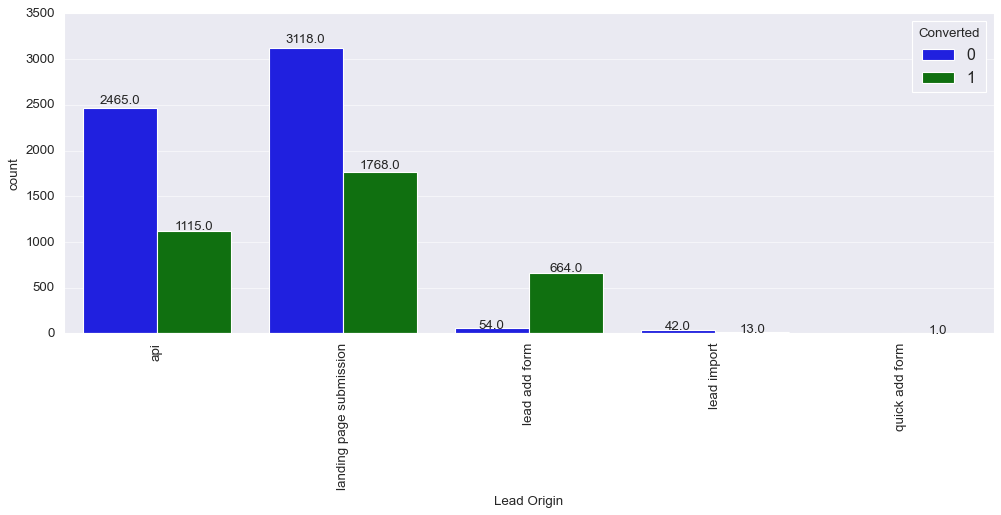

In [70]:
varcate('Lead Origin')

### INSIGHT: Customers through lead add form have high conversion of around 664.

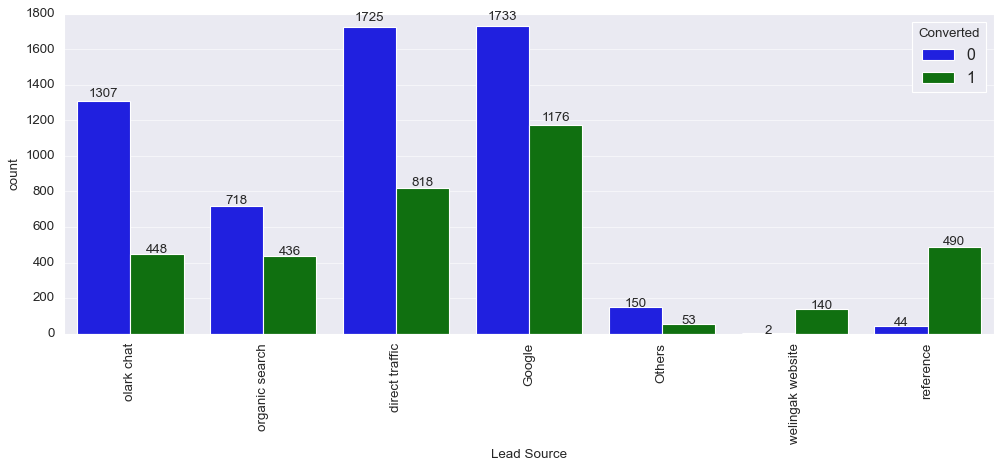

In [71]:
varcate('Lead Source')

#### INSIGHT: Customers through reference and wellngak website  have high conversion rate of around 490 and 140 respectively

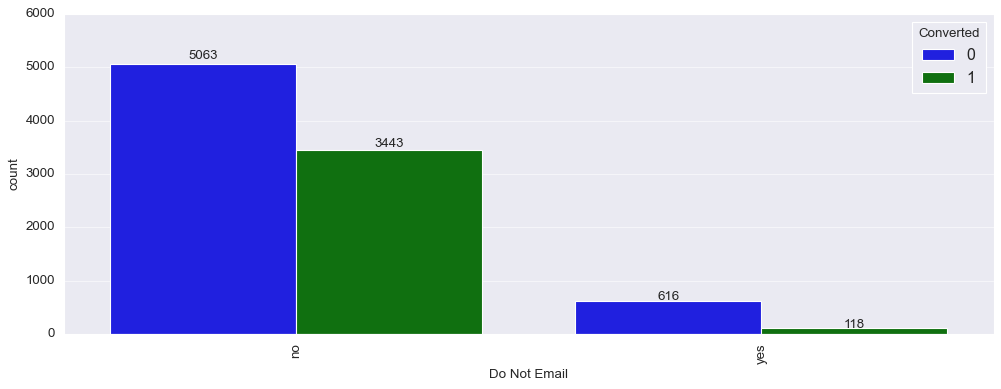

In [72]:
varcate('Do Not Email')

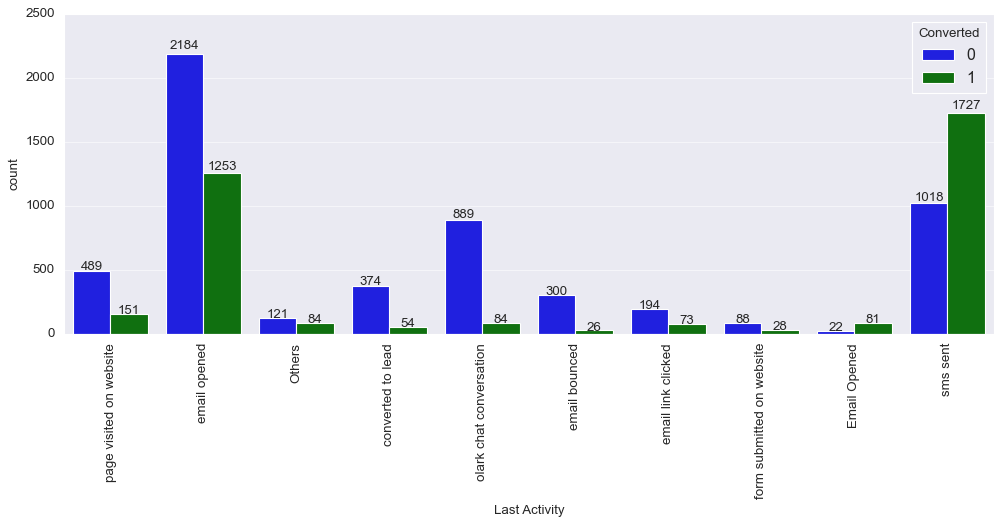

In [73]:
varcate('Last Activity')

#### INSIGHTS: Customers whoese last activity is eithier email opened or sms sent have higher conversion rates

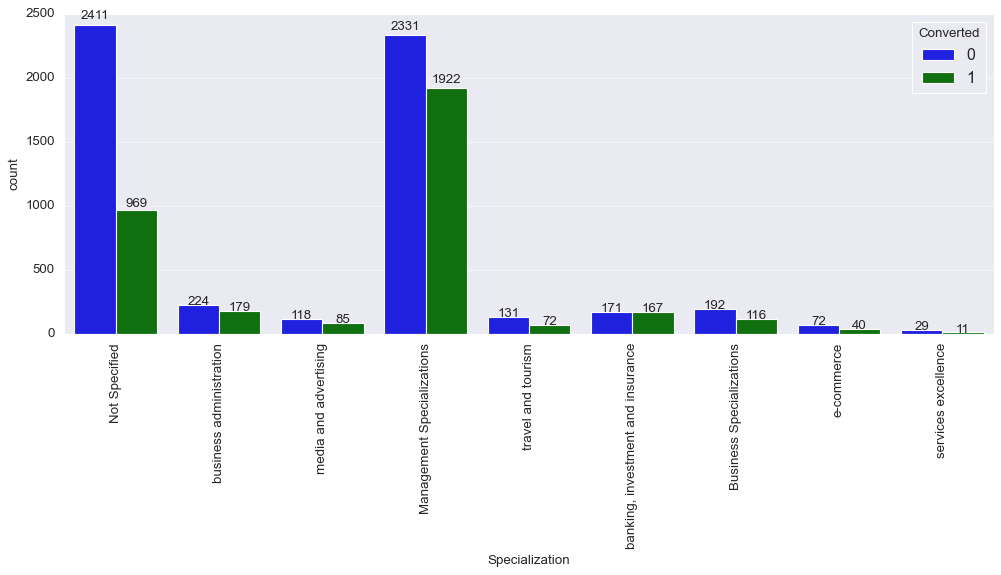

In [74]:
varcate('Specialization')

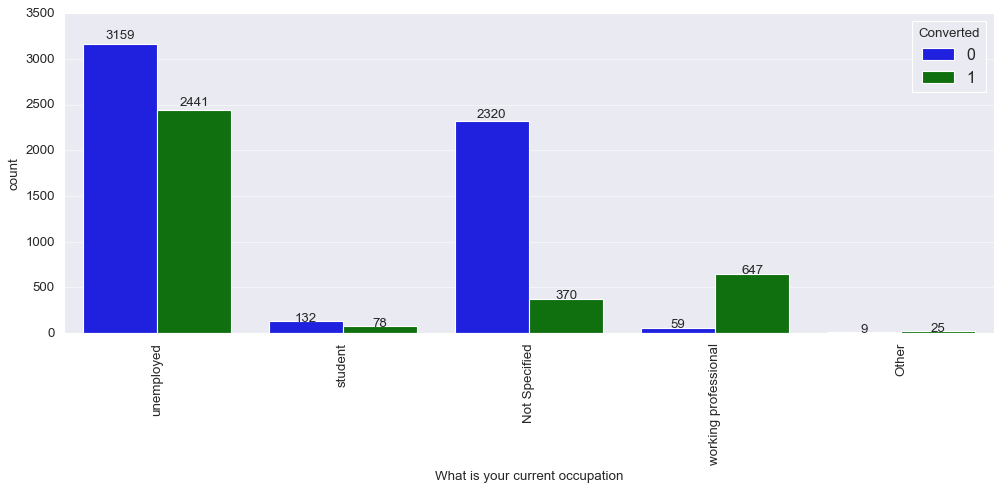

In [75]:
varcate('What is your current occupation')

#### INSIGHTS: Customers which are working professionals are having higher conversion rates of around 647

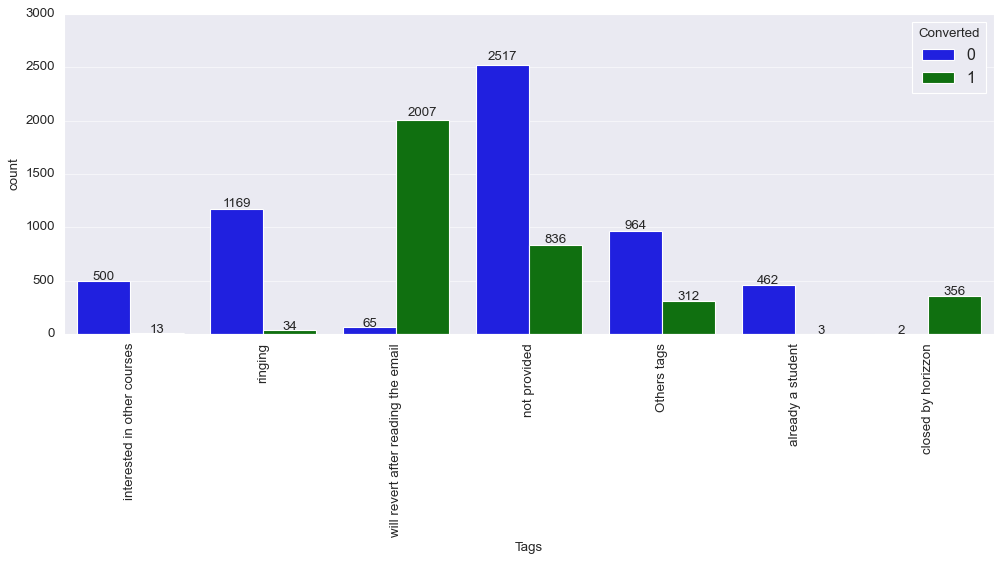

In [76]:
varcate('Tags')

#### INSIGHTS: Customers will revert after reading the email have higher conversion rate around 2007

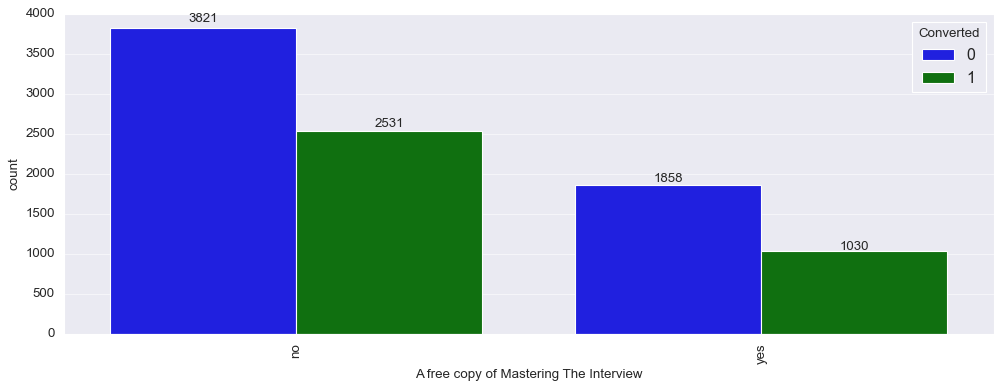

In [77]:
varcate('A free copy of Mastering The Interview')

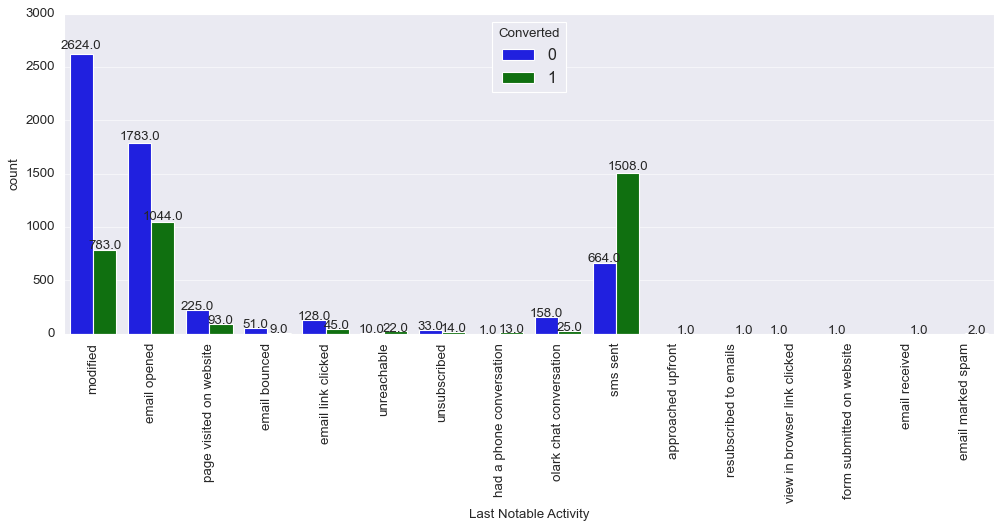

In [78]:
varcate('Last Notable Activity')

#### INSIGHTS: Customers whoese sms sents are last activity performed by the lead generators are higher conversion amount of data.

###  NUMERICAL VARIABLES

### CHECKING IMBALANCE OF DATASET

In [79]:
leadinal['Converted'].value_counts(dropna = False)

0    5679
1    3561
Name: Converted, dtype: int64

In [80]:
Converted = (sum(leadinal['Converted'])/len(leadinal['Converted'].index))*100
Converted

38.53896103896104

#### We observe that only 38% of the leads are converted, where as 62% are not converted. This shows data imbalance in the dataset. The data is biased towards leads that are not converted.

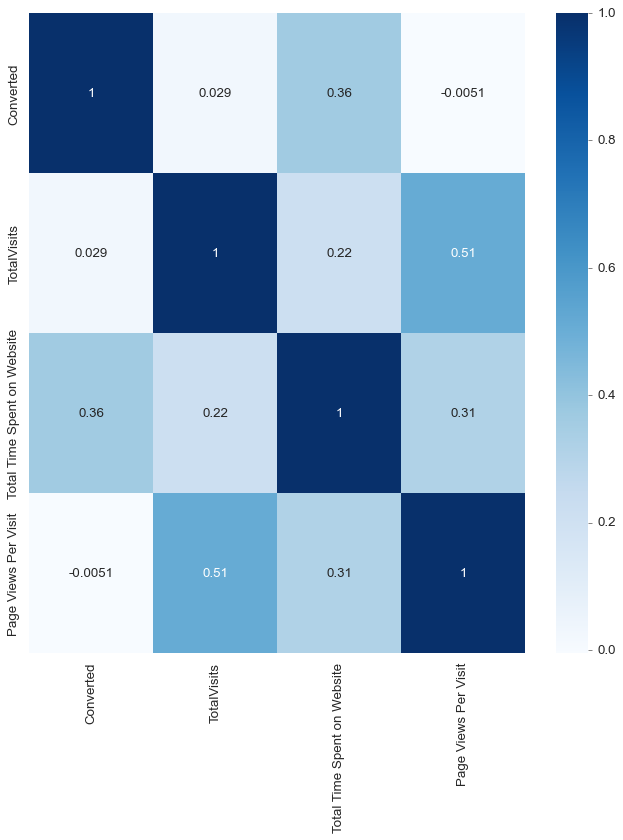

In [81]:
# Visualizing correaltions between numerical variables 
plt.figure(figsize = (10,10))
# Using heatmap for checking numerical variable correlation.
sns.heatmap(leadinal.corr(), annot = True, cmap= 'Blues')
plt.show()

###  OUTLIER TREATMENTS

###  TOTAL VISITS

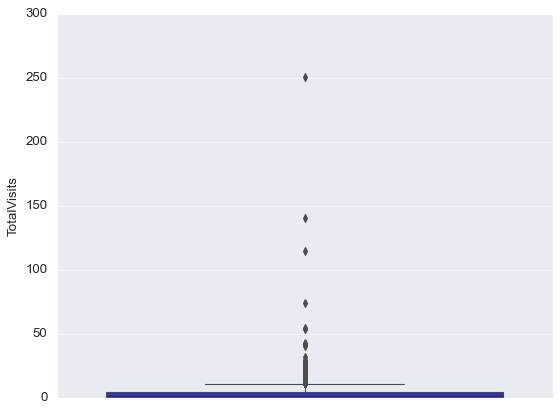

In [82]:
#Visulaizing outliers for 'TotalVisits'
sns.boxplot(y= leadinal['TotalVisits'])
plt.show()

In [83]:
# Visualizing data for each percentiles for the 'Total visits'
leadinal['TotalVisits'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

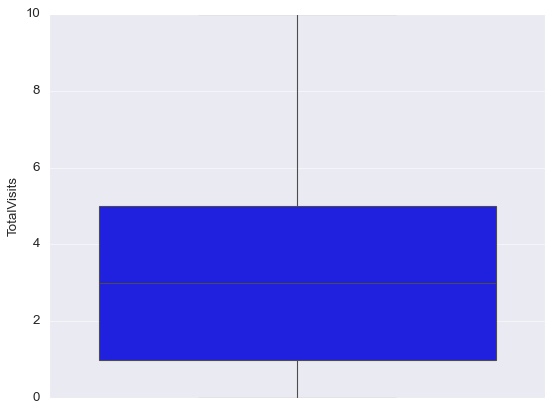

In [84]:
#Outlier treatment for 0.05 and 0.95 percentiles
percentiles = leadinal['TotalVisits'].quantile([0.05,0.95]).values
leadinal['TotalVisits'][leadinal['TotalVisits'] <= percentiles[0]] = percentiles[0]
leadinal['TotalVisits'][leadinal['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing  outlier treatment
sns.boxplot(y=leadinal['TotalVisits'])
plt.show()

###  Total Time Spent on Website

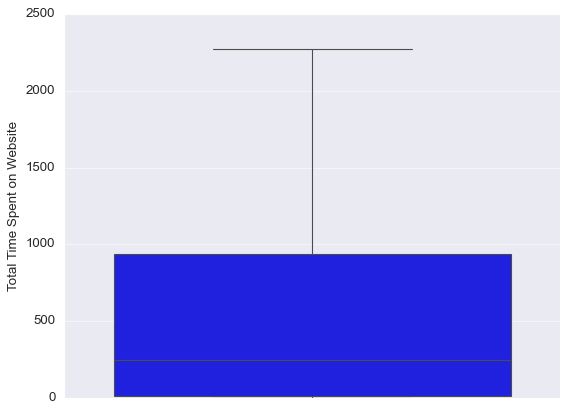

In [85]:
#Visulaizing outliers for 'Total Time Spent on Website'
sns.boxplot(y = leadinal['Total Time Spent on Website'])
plt.show()

#### INSIGHT : No outlier for this variable so no need for anykind of treatment.

###  Page Views Per Visit

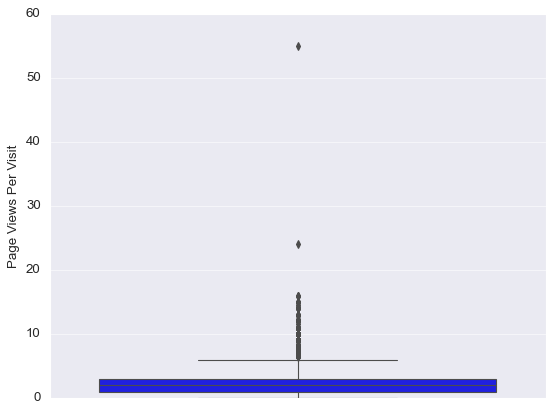

In [86]:
#Visulaizing outliers for 'Page Views Per Visit'
sns.boxplot(y = leadinal['Page Views Per Visit'])
plt.show()

In [87]:
# Visualizing data for each percentiles for the 'Page Views Per Visit'
leadinal['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

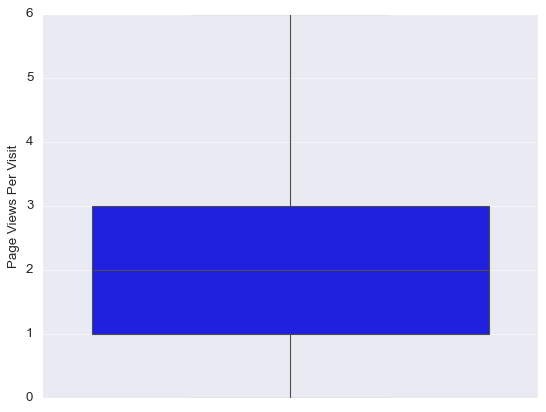

In [88]:
#Outlier treatment for 0.05 and 0.95 percentiles
percentiles = leadinal['Page Views Per Visit'].quantile([0.05,0.95]).values
leadinal['Page Views Per Visit'][leadinal['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leadinal['Page Views Per Visit'][leadinal['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leadinal['Page Views Per Visit'])
plt.show()

###  TotalVisits' vs 'Converted'

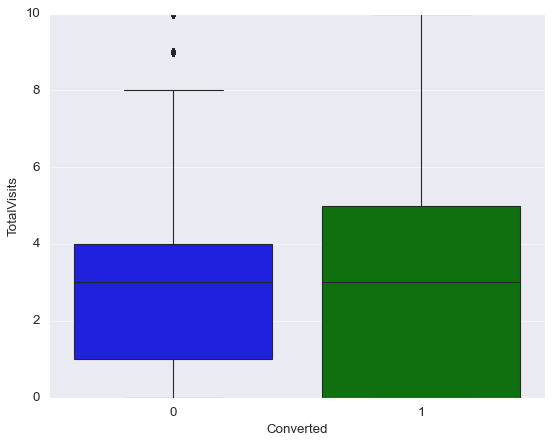

In [89]:
sns.boxplot(x = leadinal['Converted'], y = leadinal['TotalVisits'])
plt.show()

### 'Page Views Per Visit' vs 'Converted'

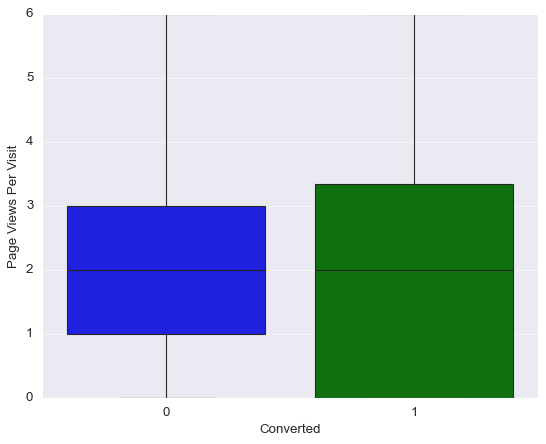

In [90]:
sns.boxplot(x = leadinal['Converted'], y = leadinal['Page Views Per Visit'])
plt.show()

###  'Total Time Spent on Website' vs 'Converted'

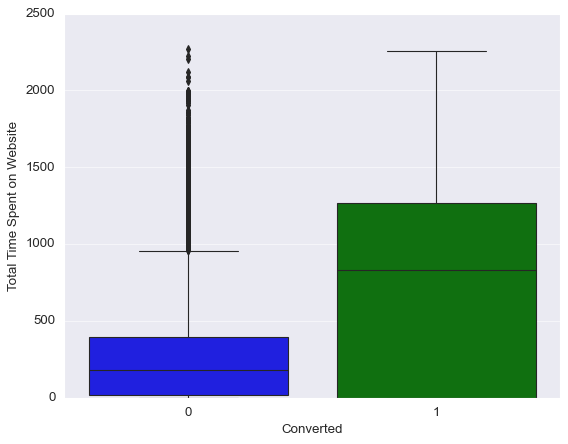

In [91]:
sns.boxplot(x = leadinal['Converted'], y = leadinal['Total Time Spent on Website'])
plt.show()

### BIVARIATE ANALYSIS FOR NUMERICAL VARIABLES

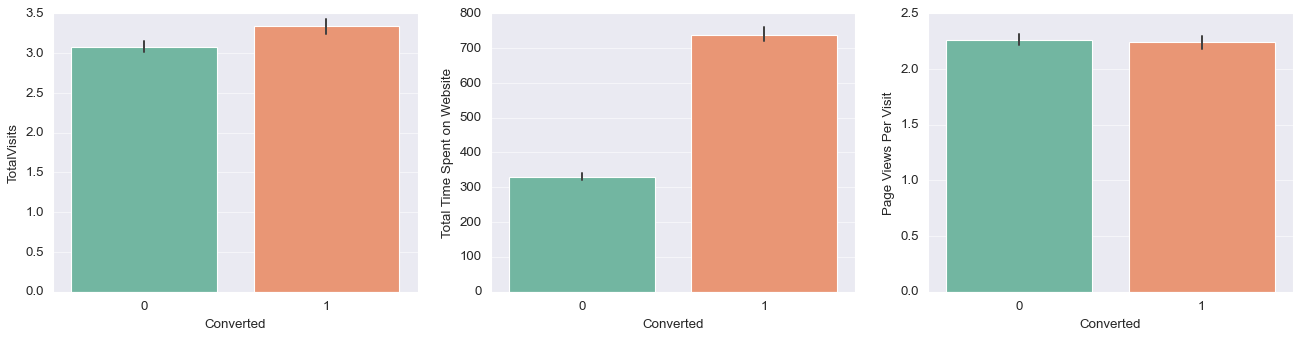

In [92]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadinal)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadinal)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadinal)
plt.show()

###  DATA PREPARATION

####  Converting some binary variables (Yes/No) to 0/1

In [93]:
leadinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [94]:
# Created function for binary conversion of two categorical variable  
def binary_map(x):
    return x.map({'yes': 1, 'no':0})

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Applying the above custom function

leadinal[varlist] = leadinal[varlist].apply(binary_map)

In [95]:
leadinal.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,Not Specified,unemployed,interested in other courses,0,modified
1,api,organic search,0,0,5.0,674,2.5,email opened,Not Specified,unemployed,ringing,0,email opened
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,will revert after reading the email,1,email opened
3,landing page submission,direct traffic,0,0,1.0,305,1.0,Others,media and advertising,unemployed,ringing,0,modified
4,landing page submission,Google,0,1,2.0,1428,1.0,converted to lead,Not Specified,unemployed,will revert after reading the email,0,modified


####  DUMMY VARIABLE CREATION

In [96]:
#Identifying categorical variables for dummy variable creation
colcategory=leadinal.select_dtypes(include='object').columns
colcategory

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [97]:
#Dummy variable creation for 'Lead Origin'
dummy = pd.get_dummies(leadinal[['Lead Origin']], drop_first=True)
leadinal = pd.concat([leadinal,dummy],1)


In [98]:
leadinal.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,Not Specified,unemployed,interested in other courses,0,modified,0,0,0,0
1,api,organic search,0,0,5.0,674,2.5,email opened,Not Specified,unemployed,ringing,0,email opened,0,0,0,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,will revert after reading the email,1,email opened,1,0,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.0,Others,media and advertising,unemployed,ringing,0,modified,1,0,0,0
4,landing page submission,Google,0,1,2.0,1428,1.0,converted to lead,Not Specified,unemployed,will revert after reading the email,0,modified,1,0,0,0


In [99]:
#Dummy variable creation for 'Lead Source'
dummy = pd.get_dummies(leadinal['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leadinal = pd.concat([leadinal, dummy], axis = 1)

In [100]:
leadinal

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_Google,Lead Source_direct traffic,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_welingak website
0,api,olark chat,0,0,0.0,0,0.00,page visited on website,Not Specified,unemployed,...,0,0,0,0,0,0,1,0,0,0
1,api,organic search,0,0,5.0,674,2.50,email opened,Not Specified,unemployed,...,0,0,0,0,0,0,0,1,0,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.00,email opened,business administration,student,...,1,0,0,0,0,1,0,0,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.00,Others,media and advertising,unemployed,...,1,0,0,0,0,1,0,0,0,0
4,landing page submission,Google,0,1,2.0,1428,1.00,converted to lead,Not Specified,unemployed,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,1,1,8.0,1845,2.67,Others,Management Specializations,unemployed,...,1,0,0,0,0,1,0,0,0,0
9236,landing page submission,direct traffic,0,0,2.0,238,2.00,sms sent,media and advertising,unemployed,...,1,0,0,0,0,1,0,0,0,0
9237,landing page submission,direct traffic,1,0,2.0,199,2.00,sms sent,business administration,unemployed,...,1,0,0,0,0,1,0,0,0,0
9238,landing page submission,Google,0,1,3.0,499,3.00,sms sent,Management Specializations,Not Specified,...,1,0,0,0,1,0,0,0,0,0


In [101]:
#Dummy variable creation for 'Last Activity'
dummy = pd.get_dummies(leadinal['Last Activity'], prefix  = 'Lead_Activity')
dummy = dummy.drop(['Lead_Activity_Others'], 1)
leadinal = pd.concat([leadinal, dummy], axis = 1)

In [102]:
leadinal

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Lead Source_welingak website,Lead_Activity_Email Opened,Lead_Activity_converted to lead,Lead_Activity_email bounced,Lead_Activity_email link clicked,Lead_Activity_email opened,Lead_Activity_form submitted on website,Lead_Activity_olark chat conversation,Lead_Activity_page visited on website,Lead_Activity_sms sent
0,api,olark chat,0,0,0.0,0,0.00,page visited on website,Not Specified,unemployed,...,0,0,0,0,0,0,0,0,1,0
1,api,organic search,0,0,5.0,674,2.50,email opened,Not Specified,unemployed,...,0,0,0,0,0,1,0,0,0,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.00,email opened,business administration,student,...,0,0,0,0,0,1,0,0,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.00,Others,media and advertising,unemployed,...,0,0,0,0,0,0,0,0,0,0
4,landing page submission,Google,0,1,2.0,1428,1.00,converted to lead,Not Specified,unemployed,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,1,1,8.0,1845,2.67,Others,Management Specializations,unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,0,0,2.0,238,2.00,sms sent,media and advertising,unemployed,...,0,0,0,0,0,0,0,0,0,1
9237,landing page submission,direct traffic,1,0,2.0,199,2.00,sms sent,business administration,unemployed,...,0,0,0,0,0,0,0,0,0,1
9238,landing page submission,Google,0,1,3.0,499,3.00,sms sent,Management Specializations,Not Specified,...,0,0,0,0,0,0,0,0,0,1


In [103]:
#Dummy variable creation for 'Specialization'
dummy = pd.get_dummies(leadinal['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leadinal = pd.concat([leadinal, dummy], axis = 1)

In [104]:
leadinal

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Lead_Activity_page visited on website,Lead_Activity_sms sent,Specialization_Business Specializations,Specialization_Management Specializations,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-commerce,Specialization_media and advertising,Specialization_services excellence,Specialization_travel and tourism
0,api,olark chat,0,0,0.0,0,0.00,page visited on website,Not Specified,unemployed,...,1,0,0,0,0,0,0,0,0,0
1,api,organic search,0,0,5.0,674,2.50,email opened,Not Specified,unemployed,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.00,email opened,business administration,student,...,0,0,0,0,0,1,0,0,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.00,Others,media and advertising,unemployed,...,0,0,0,0,0,0,0,1,0,0
4,landing page submission,Google,0,1,2.0,1428,1.00,converted to lead,Not Specified,unemployed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,1,1,8.0,1845,2.67,Others,Management Specializations,unemployed,...,0,0,0,1,0,0,0,0,0,0
9236,landing page submission,direct traffic,0,0,2.0,238,2.00,sms sent,media and advertising,unemployed,...,0,1,0,0,0,0,0,1,0,0
9237,landing page submission,direct traffic,1,0,2.0,199,2.00,sms sent,business administration,unemployed,...,0,1,0,0,0,1,0,0,0,0
9238,landing page submission,Google,0,1,3.0,499,3.00,sms sent,Management Specializations,Not Specified,...,0,1,0,1,0,0,0,0,0,0


In [105]:
#Dummy variable creation for 'Specialization'
dummy = pd.get_dummies(leadinal['What is your current occupation'], prefix  = 'Occupation')
dummy = dummy.drop(['Occupation_Other','Occupation_Not Specified'], 1)
leadinal = pd.concat([leadinal, dummy], axis = 1)

In [106]:
leadinal.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Management Specializations,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-commerce,Specialization_media and advertising,Specialization_services excellence,Specialization_travel and tourism,Occupation_student,Occupation_unemployed,Occupation_working professional
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,Not Specified,unemployed,...,0,0,0,0,0,0,0,0,1,0
1,api,organic search,0,0,5.0,674,2.5,email opened,Not Specified,unemployed,...,0,0,0,0,0,0,0,0,1,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,...,0,0,1,0,0,0,0,1,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.0,Others,media and advertising,unemployed,...,0,0,0,0,1,0,0,0,1,0
4,landing page submission,Google,0,1,2.0,1428,1.0,converted to lead,Not Specified,unemployed,...,0,0,0,0,0,0,0,0,1,0


In [107]:
#Dummy variable creation for 'Specialization'
dummy = pd.get_dummies(leadinal['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_not provided'], 1)
leadinal = pd.concat([leadinal, dummy], axis = 1)

In [108]:
leadinal.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_travel and tourism,Occupation_student,Occupation_unemployed,Occupation_working professional,Tags_Others tags,Tags_already a student,Tags_closed by horizzon,Tags_interested in other courses,Tags_ringing,Tags_will revert after reading the email
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,Not Specified,unemployed,...,0,0,1,0,0,0,0,1,0,0
1,api,organic search,0,0,5.0,674,2.5,email opened,Not Specified,unemployed,...,0,0,1,0,0,0,0,0,1,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,...,0,1,0,0,0,0,0,0,0,1
3,landing page submission,direct traffic,0,0,1.0,305,1.0,Others,media and advertising,unemployed,...,0,0,1,0,0,0,0,0,1,0
4,landing page submission,Google,0,1,2.0,1428,1.0,converted to lead,Not Specified,unemployed,...,0,0,1,0,0,0,0,0,0,1


In [109]:
#Dummy variable creation for 'Last Notable Activity'
dummy = pd.get_dummies(leadinal['Last Notable Activity'], prefix  = 'Last_Notable_Activity')

leadinal = pd.concat([leadinal, dummy], axis = 1)

In [110]:
leadinal.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_page visited on website,Last_Notable_Activity_resubscribed to emails,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed,Last_Notable_Activity_view in browser link clicked
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,Not Specified,unemployed,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,0,0,5.0,674,2.5,email opened,Not Specified,unemployed,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.0,Others,media and advertising,unemployed,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,Google,0,1,2.0,1428,1.0,converted to lead,Not Specified,unemployed,...,0,0,1,0,0,0,0,0,0,0


####  DROPPING ORIGNAL CATEGORICAL COLUMNS AFTER DUMMY VARIABLE CREATION

In [111]:
leadinal.drop(colcategory,1,inplace = True)

In [112]:
leadinal.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,...,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_page visited on website,Last_Notable_Activity_resubscribed to emails,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed,Last_Notable_Activity_view in browser link clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [113]:
leadinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9240 non-null   int64  
 1   Converted                                           9240 non-null   int64  
 2   TotalVisits                                         9240 non-null   float64
 3   Total Time Spent on Website                         9240 non-null   int64  
 4   Page Views Per Visit                                9240 non-null   float64
 5   A free copy of Mastering The Interview              9240 non-null   int64  
 6   Lead Origin_landing page submission                 9240 non-null   uint8  
 7   Lead Origin_lead add form                           9240 non-null   uint8  
 8   Lead Origin_lead import                             9240 non-null   uint8  
 9

##  MODEL BUILDING

In [114]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### SPLITING TRAIN AND TEST DATASETS

In [115]:
# Putting feature variable to X
X=leadinal.drop('Converted', axis=1)

#checking head of X
X.shape


(9240, 57)

In [116]:
# Putting response variable to y
y = leadinal['Converted']

#checking head of y
y.shape

(9240,)

In [117]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 100)

In [118]:
X_train.shape

(6468, 57)

In [119]:
X_test.shape

(2772, 57)

In [120]:
y_train.shape

(6468,)

In [121]:
y_test.shape

(2772,)

### FEATURE SCALING

In [122]:
scale=StandardScaler()

In [123]:
# Scaling the Numerical variables
colnumerical=X_train.select_dtypes(include=['float64','int64']).columns

In [124]:
X_train[colnumerical]=scale.fit_transform(X_train[colnumerical])

In [125]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_Google,...,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_page visited on website,Last_Notable_Activity_resubscribed to emails,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed,Last_Notable_Activity_view in browser link clicked
1871,-0.291638,-1.149699,-0.885371,-1.266675,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,-0.291638,0.299722,0.005716,-0.516439,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,-0.291638,0.662077,-0.691418,0.143543,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,-0.291638,0.662077,1.365219,1.553761,-0.673169,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,-0.291638,-1.149699,-0.885371,-1.266675,-0.673169,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


###  USING RFE (RECURSIVE FEATURE ELIMINATION)FOR MODEL BUILDING AND STATS MODEL

In [126]:
import statsmodels.api as sm

In [127]:
logiregress=LogisticRegression()

In [128]:
refeel=RFE(logiregress,n_features_to_select=20)

In [129]:
refeel=refeel.fit(X_train,y_train)

In [130]:
refeel.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False])

In [131]:
list(zip(X_train.columns, refeel.support_, refeel.ranking_))

[('Do Not Email', False, 16),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_landing page submission', False, 12),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 13),
 ('Lead Origin_quick add form', False, 20),
 ('Lead Source_Google', False, 30),
 ('Lead Source_direct traffic', False, 29),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 23),
 ('Lead Source_reference', False, 31),
 ('Lead Source_welingak website', True, 1),
 ('Lead_Activity_Email Opened', False, 5),
 ('Lead_Activity_converted to lead', False, 14),
 ('Lead_Activity_email bounced', True, 1),
 ('Lead_Activity_email link clicked', False, 36),
 ('Lead_Activity_email opened', True, 1),
 ('Lead_Activity_form submitted on website', False, 19),
 ('Lead_Activity_olark chat conversation', False, 7),
 ('Lead_Activity_page visited on website',

In [132]:
#Feature selected for model building
varsel=X_train.columns[refeel.support_]
varsel

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_olark chat', 'Lead Source_welingak website',
       'Lead_Activity_email bounced', 'Lead_Activity_email opened',
       'Lead_Activity_sms sent', 'Occupation_student', 'Occupation_unemployed',
       'Occupation_working professional', 'Tags_Others tags',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_interested in other courses', 'Tags_ringing',
       'Tags_will revert after reading the email',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_modified',
       'Last_Notable_Activity_olark chat conversation',
       'Last_Notable_Activity_resubscribed to emails'],
      dtype='object')

In [133]:
#Feature not selected for model building
varnotsel=X_train.columns[~refeel.support_]
varnotsel

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_landing page submission', 'Lead Origin_lead import',
       'Lead Origin_quick add form', 'Lead Source_Google',
       'Lead Source_direct traffic', 'Lead Source_organic search',
       'Lead Source_reference', 'Lead_Activity_Email Opened',
       'Lead_Activity_converted to lead', 'Lead_Activity_email link clicked',
       'Lead_Activity_form submitted on website',
       'Lead_Activity_olark chat conversation',
       'Lead_Activity_page visited on website',
       'Specialization_Business Specializations',
       'Specialization_Management Specializations',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-commerce',
       'Specialization_media and advertising',
       'Specialization_services excellence',
       'Specialization_travel and tourism',
       'Last_Notable_Activity

####  MODEL 1

In [134]:
X_train_stmod=sm.add_constant(X_train[varsel])

In [135]:
lrmod1=sm.GLM(y_train,X_train_stmod,family=sm.families.Binomial())

In [136]:
resultmod=lrmod1.fit()

In [137]:
resultmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.7
Date:                Sun, 18 Feb 2024   Deviance:                       2895.4
Time:                        13:10:09   Pearson chi2:                 8.30e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5859
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.5729      0.163    -15.750      0.000      -2.893      -2.253
Total Time Spent on Website                        1.0752      0.055     19.429      0.000       0.967       1.184
Lead Origin_lead add form                          1.7541      0.324      5.416      0.000       1.119       2.389
Lead Source_olark chat                             1.1438      0.138      8.263      0.000       0.872       1.415
Lead Source_welingak website                       2.6003      0.800      3.250      0.001       1.032       4.168
Lead_Activity_email bounced                       -1.1194      0.399     -2.805      0.005      -1.901      -0.337
Lead_Activity_email opened                         0.5782      0.151      3.839      0.000       0.283       0.873
Lead_Activity_sms sent                             1.9456      0.149     13.074      0.000       1.654       2.237
Occupation_student                                 1.5616      0.497      3.143      0.002       0.588       2.535
Occupation_unemployed                              1.7785      0.138     12.883      0.000       1.508       2.049
Occupation_working professional                    2.4234      0.334      7.253      0.000       1.769       3.078
Tags_Others tags                                  -1.3406      0.151     -8.852      0.000      -1.637      -1.044
Tags_already a student                            -4.9128      0.736     -6.672      0.000      -6.356      -3.470
Tags_closed by horizzon                            5.4605      1.020      5.352      0.000       3.461       7.460
Tags_interested in other courses                  -3.0826      0.353     -8.744      0.000      -3.774      -2.392
Tags_ringing                                      -4.4123      0.251    -17.559      0.000      -4.905      -3.920
Tags_will revert after reading the email           2.9559      0.206     14.376      0.000       2.553       3.359
Last_Notable_Activity_had a phone conversation     2.9030      1.367      2.124      0.034       0.225       5.581
Last_Notable_Activity_modified                    -0.8043      0.120     -6.681      0.000      -1.040      -0.568
Last_Notable_Activity_olark chat conversation     -0.7749      0.422     -1.837      0.066      -1.602       0.052
Last_Notable_Activity_resubscribed to emails      24.2878   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
==================================================================================================================
"""

In [138]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vainfa = pd.DataFrame()
vainfa['Features'] = X_train[varsel].columns
vainfa['VIF'] = [variance_inflation_factor(X_train[varsel].values, i) for i in range(X_train[varsel].shape[1])]
vainfa['VIF'] = round(vainfa['VIF'], 2)
vainfa = vainfa.sort_values(by = "VIF", ascending = False)
vainfa

,Features,VIF
8,Occupation_unemployed,8.56
15,Tags_will revert after reading the email,4.07
14,Tags_ringing,2.67
10,Tags_Others tags,2.63
9,Occupation_working professional,2.36
6,Lead_Activity_sms sent,1.84
1,Lead Origin_lead add form,1.81
11,Tags_already a student,1.74
13,Tags_interested in other courses,1.71
5,Lead_Activity_email opened,1.71


#### As VIF is higher than 5 for Occupation_unemployed we will drop and again build a new model version

In [139]:
varsel=varsel.drop('Occupation_unemployed',1)
varsel

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_olark chat', 'Lead Source_welingak website',
       'Lead_Activity_email bounced', 'Lead_Activity_email opened',
       'Lead_Activity_sms sent', 'Occupation_student',
       'Occupation_working professional', 'Tags_Others tags',
       'Tags_already a student', 'Tags_closed by horizzon',
       'Tags_interested in other courses', 'Tags_ringing',
       'Tags_will revert after reading the email',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_modified',
       'Last_Notable_Activity_olark chat conversation',
       'Last_Notable_Activity_resubscribed to emails'],
      dtype='object')

####  MODEL 2

In [140]:
X_train_stmod=sm.add_constant(X_train[varsel])

In [141]:
lrmod2=sm.GLM(y_train,X_train_stmod,family=sm.families.Binomial())

In [142]:
resultmod=lrmod2.fit()

In [143]:
resultmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1534.2
Date:                Sun, 18 Feb 2024   Deviance:                       3068.4
Time:                        13:10:10   Pearson chi2:                 8.19e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5747
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0530      0.150    -13.723      0.000      -2.346      -1.760
Total Time Spent on Website                        1.0896      0.054     20.344      0.000       0.985       1.195
Lead Origin_lead add form                          2.0869      0.327      6.380      0.000       1.446       2.728
Lead Source_olark chat                             1.2854      0.132      9.743      0.000       1.027       1.544
Lead Source_welingak website                       3.5301      0.798      4.424      0.000       1.966       5.094
Lead_Activity_email bounced                       -0.7973      0.393     -2.030      0.042      -1.567      -0.028
Lead_Activity_email opened                         0.5281      0.145      3.636      0.000       0.243       0.813
Lead_Activity_sms sent                             1.9697      0.144     13.718      0.000       1.688       2.251
Occupation_student                                 0.0193      0.516      0.037      0.970      -0.993       1.031
Occupation_working professional                    0.8766      0.319      2.752      0.006       0.252       1.501
Tags_Others tags                                  -0.1196      0.116     -1.033      0.302      -0.346       0.107
Tags_already a student                            -3.6778      0.733     -5.019      0.000      -5.114      -2.242
Tags_closed by horizzon                            6.6428      1.016      6.541      0.000       4.652       8.633
Tags_interested in other courses                  -1.8050      0.339     -5.321      0.000      -2.470      -1.140
Tags_ringing                                      -3.1893      0.230    -13.856      0.000      -3.640      -2.738
Tags_will revert after reading the email           4.1844      0.185     22.673      0.000       3.823       4.546
Last_Notable_Activity_had a phone conversation     2.6934      1.343      2.005      0.045       0.061       5.326
Last_Notable_Activity_modified                    -1.0268      0.116     -8.829      0.000      -1.255      -0.799
Last_Notable_Activity_olark chat conversation     -0.9089      0.398     -2.285      0.022      -1.689      -0.129
Last_Notable_Activity_resubscribed to emails      22.4179   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
==================================================================================================================
"""

In [144]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vainfa = pd.DataFrame()
vainfa['Features'] = X_train[varsel].columns
vainfa['VIF'] = [variance_inflation_factor(X_train[varsel].values, i) for i in range(X_train[varsel].shape[1])]
vainfa['VIF'] = round(vainfa['VIF'], 2)
vainfa = vainfa.sort_values(by = "VIF", ascending = False)
vainfa

,Features,VIF
14,Tags_will revert after reading the email,2.10
1,Lead Origin_lead add form,1.80
6,Lead_Activity_sms sent,1.70
5,Lead_Activity_email opened,1.61
16,Last_Notable_Activity_modified,1.58
2,Lead Source_olark chat,1.50
11,Tags_closed by horizzon,1.38
0,Total Time Spent on Website,1.37
8,Occupation_working professional,1.35
13,Tags_ringing,1.30


#### Now VIF of all the variables of the model are less than 5 and stable for model as Last_Notable_Activity_resubscribed to emails have higher p-value so we need to eliminate it and check other p-values  

In [145]:

varsel = varsel.drop('Last_Notable_Activity_resubscribed to emails',1)

####  MODEL 3

In [146]:
X_train_stmod=sm.add_constant(X_train[varsel])

In [147]:
lrmod3=sm.GLM(y_train,X_train_stmod,family=sm.families.Binomial())

In [148]:
resultmod=lrmod3.fit()

In [149]:
resultmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1536.2
Date:                Sun, 18 Feb 2024   Deviance:                       3072.4
Time:                        13:10:10   Pearson chi2:                 8.18e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5744
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0429      0.149    -13.688      0.000      -2.335      -1.750
Total Time Spent on Website                        1.0892      0.054     20.342      0.000       0.984       1.194
Lead Origin_lead add form                          2.0874      0.327      6.382      0.000       1.446       2.728
Lead Source_olark chat                             1.2937      0.132      9.814      0.000       1.035       1.552
Lead Source_welingak website                       3.5306      0.798      4.425      0.000       1.967       5.095
Lead_Activity_email bounced                       -0.8052      0.392     -2.052      0.040      -1.574      -0.036
Lead_Activity_email opened                         0.5146      0.145      3.552      0.000       0.231       0.799
Lead_Activity_sms sent                             1.9572      0.143     13.665      0.000       1.676       2.238
Occupation_student                                 0.0160      0.516      0.031      0.975      -0.996       1.028
Occupation_working professional                    0.8752      0.318      2.748      0.006       0.251       1.499
Tags_Others tags                                  -0.1098      0.116     -0.950      0.342      -0.336       0.117
Tags_already a student                            -3.6768      0.733     -5.018      0.000      -5.113      -2.241
Tags_closed by horizzon                            6.6459      1.016      6.544      0.000       4.655       8.636
Tags_interested in other courses                  -1.8032      0.339     -5.317      0.000      -2.468      -1.138
Tags_ringing                                      -3.1870      0.230    -13.848      0.000      -3.638      -2.736
Tags_will revert after reading the email           4.1851      0.185     22.681      0.000       3.823       4.547
Last_Notable_Activity_had a phone conversation     2.6788      1.343      1.995      0.046       0.047       5.310
Last_Notable_Activity_modified                    -1.0342      0.116     -8.898      0.000      -1.262      -0.806
Last_Notable_Activity_olark chat conversation     -0.9257      0.398     -2.328      0.020      -1.705      -0.146
==================================================================================================================
"""

In [150]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vainfa = pd.DataFrame()
vainfa['Features'] = X_train[varsel].columns
vainfa['VIF'] = [variance_inflation_factor(X_train[varsel].values, i) for i in range(X_train[varsel].shape[1])]
vainfa['VIF'] = round(vainfa['VIF'], 2)
vainfa = vainfa.sort_values(by = "VIF", ascending = False)
vainfa

,Features,VIF
14,Tags_will revert after reading the email,2.10
1,Lead Origin_lead add form,1.80
6,Lead_Activity_sms sent,1.70
5,Lead_Activity_email opened,1.61
16,Last_Notable_Activity_modified,1.58
2,Lead Source_olark chat,1.50
11,Tags_closed by horizzon,1.38
0,Total Time Spent on Website,1.37
8,Occupation_working professional,1.35
13,Tags_ringing,1.30


#### As we can check p-values for 'Occupation_student','Tags_Others tags' are higher than 0.05 still so we need to eliminate that variable and VIF is stable .

In [151]:
varsel = varsel.drop(['Occupation_student','Tags_Others tags'],1)

####  MODEL 4

In [152]:
X_train_stmod=sm.add_constant(X_train[varsel])

In [153]:
lrmod4=sm.GLM(y_train,X_train_stmod,family=sm.families.Binomial())

In [154]:
resultmod=lrmod4.fit()

In [155]:
resultmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1536.6
Date:                Sun, 18 Feb 2024   Deviance:                       3073.3
Time:                        13:10:10   Pearson chi2:                 8.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5744
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0825      0.144    -14.507      0.000      -2.364      -1.801
Total Time Spent on Website                        1.0903      0.054     20.369      0.000       0.985       1.195
Lead Origin_lead add form                          2.0802      0.326      6.371      0.000       1.440       2.720
Lead Source_olark chat                             1.3162      0.130     10.137      0.000       1.062       1.571
Lead Source_welingak website                       3.5731      0.797      4.486      0.000       2.012       5.134
Lead_Activity_email bounced                       -0.7986      0.392     -2.037      0.042      -1.567      -0.030
Lead_Activity_email opened                         0.5184      0.145      3.580      0.000       0.235       0.802
Lead_Activity_sms sent                             1.9561      0.143     13.653      0.000       1.675       2.237
Occupation_working professional                    0.8564      0.317      2.704      0.007       0.236       1.477
Tags_already a student                            -3.6458      0.729     -5.004      0.000      -5.074      -2.218
Tags_closed by horizzon                            6.6851      1.015      6.588      0.000       4.696       8.674
Tags_interested in other courses                  -1.7687      0.337     -5.249      0.000      -2.429      -1.108
Tags_ringing                                      -3.1497      0.227    -13.896      0.000      -3.594      -2.705
Tags_will revert after reading the email           4.2239      0.179     23.569      0.000       3.873       4.575
Last_Notable_Activity_had a phone conversation     2.6658      1.341      1.987      0.047       0.037       5.295
Last_Notable_Activity_modified                    -1.0333      0.116     -8.891      0.000      -1.261      -0.805
Last_Notable_Activity_olark chat conversation     -0.9137      0.398     -2.298      0.022      -1.693      -0.134
==================================================================================================================
"""

In [156]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vainfa = pd.DataFrame()
vainfa['Features'] = X_train[varsel].columns
vainfa['VIF'] = [variance_inflation_factor(X_train[varsel].values, i) for i in range(X_train[varsel].shape[1])]
vainfa['VIF'] = round(vainfa['VIF'], 2)
vainfa = vainfa.sort_values(by = "VIF", ascending = False)
vainfa

,Features,VIF
12,Tags_will revert after reading the email,1.97
1,Lead Origin_lead add form,1.80
6,Lead_Activity_sms sent,1.55
2,Lead Source_olark chat,1.49
14,Last_Notable_Activity_modified,1.46
5,Lead_Activity_email opened,1.44
0,Total Time Spent on Website,1.37
9,Tags_closed by horizzon,1.36
7,Occupation_working professional,1.34
3,Lead Source_welingak website,1.27


#### All variables have a good value of VIF and p-value for all the features are less than 0.05 . So we need not drop any more variables and we can proceed with making predictions using this model only.

##  MODEL EVALUATION

###  PREDICT TRAIN MODEL

In [157]:
y_train_predict =resultmod.predict(X_train_stmod)

In [158]:
y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([0.01258055, 0.17395157, 0.01549724, 0.14336001, 0.09565465,
       0.99907522, 0.00403146, 0.99801653, 0.07905995, 0.99807385])

In [159]:
# Creating the DataFrame with Actual Converted and Predicted Probabilities
y_train_predict_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_predict})
y_train_predict_final['Prospect ID'] = y_train.index
y_train_predict_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.012581,1871
1,0,0.173952,6795
2,0,0.015497,3516
3,0,0.143360,8105
4,0,0.095655,3934


In [160]:
# Making a new column Predicted with values which have Probability greater than 0.5
y_train_predict_final['Predicted'] = y_train_predict_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predict_final.head(20)

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.012581,1871,0
1,0,0.173952,6795,0
2,0,0.015497,3516,0
3,0,0.143360,8105,0
4,0,0.095655,3934,0
5,1,0.999075,4844,1
6,0,0.004031,3297,0
7,1,0.998017,8071,1
8,0,0.079060,987,0
9,1,0.998074,7423,1


###  METRICS CALCULATION FOR TRAIN MODEL

In [161]:
from sklearn import metrics

In [162]:
print(metrics.accuracy_score(y_true= y_train_predict_final.Converted, y_pred= y_train_predict_final.Predicted))

0.9076994434137291


In [163]:
confusion = metrics.confusion_matrix(y_true= y_train_predict_final.Converted, y_pred= y_train_predict_final.Predicted)
confusion

array([[3800,  202],
       [ 395, 2071]], dtype=int64)

In [164]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3800            202
    # Converted            395             2071 

In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8398215733982157

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.9495252373813093

In [168]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.050474762618690654


In [169]:
# positive predictive value 
print (TP / float(TP+FP))

0.9111306643202816


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9058402860548271


### PLOTTING ROC CURVE 

In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_predict_final.Converted, y_train_predict_final.Converted_prob,
                                         drop_intermediate = False)

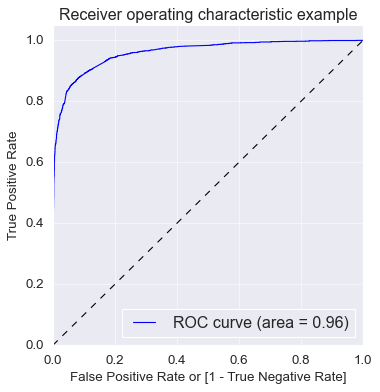

In [173]:
draw_roc(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

###  FINDING OPTIMAL CUT-OFF POINTS 

In [174]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predict_final[i]= y_train_predict_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_predict_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.012581,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.173952,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.015497,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.143360,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.095655,3934,0,1,0,0,0,0,0,0,0,0,0
5,1,0.999075,4844,1,1,1,1,1,1,1,1,1,1,1
6,0,0.004031,3297,0,1,0,0,0,0,0,0,0,0,0
7,1,0.998017,8071,1,1,1,1,1,1,1,1,1,1,1
8,0,0.079060,987,0,1,0,0,0,0,0,0,0,0,0
9,1,0.998074,7423,1,1,1,1,1,1,1,1,1,1,1


In [175]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.793754     0.967559     0.686657
0.2   0.2  0.866883     0.935929     0.824338
0.3   0.3  0.895485     0.892133     0.897551
0.4   0.4  0.905380     0.862125     0.932034
0.5   0.5  0.907699     0.839822     0.949525
0.6   0.6  0.898423     0.787105     0.967016
0.7   0.7  0.893166     0.758719     0.976012
0.8   0.8  0.881262     0.714112     0.984258
0.9   0.9  0.864873     0.660178     0.991004


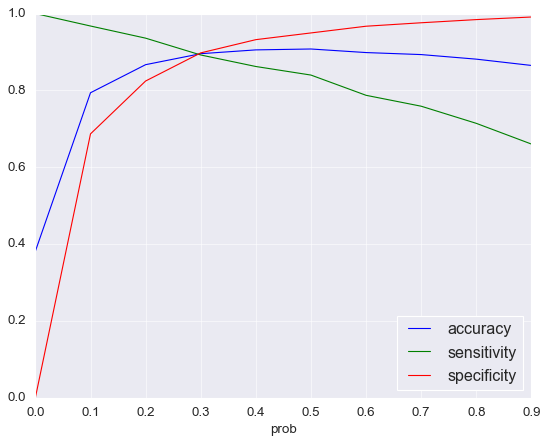

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, we can see that 0.3 is our Optimal Point

In [177]:
y_train_predict_final['Final_Predicted'] = y_train_predict_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_predict_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.012581,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.173952,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.015497,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.143360,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.095655,3934,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.999075,4844,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.004031,3297,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0.998017,8071,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.079060,987,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.998074,7423,1,1,1,1,1,1,1,1,1,1,1,1


In [178]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_predict_final.Converted, y_pred= y_train_predict_final.Final_Predicted))

0.8954854669140383


In [179]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_predict_final.Converted, y_pred= y_train_predict_final.Final_Predicted)
confusion

array([[3592,  410],
       [ 266, 2200]], dtype=int64)

In [180]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3592            410
    # Converted            266             2200 

#### Metrics beyond Simple Accuracy with 0.3 as Optimal Cutoff point

In [181]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8921330089213301

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.8975512243878061

In [184]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1024487756121939


In [185]:
# Positive predictive value 
print (TP / float(TP+FP))

0.842911877394636


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.931052358735096


###  PRECISION AND RECALL 

In [187]:
from sklearn.metrics import precision_score, recall_score

In [188]:
# Precision Score
precision_score(y_train_predict_final.Converted, y_train_predict_final.Final_Predicted)

0.842911877394636

In [189]:
# Recall Score
recall_score(y_train_predict_final.Converted, y_train_predict_final.Final_Predicted)

0.8921330089213301

####  PRECISON AND RECALL TRADEOFF

In [190]:
from sklearn.metrics import precision_recall_curve

In [191]:
p, r, thresholds = precision_recall_curve(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

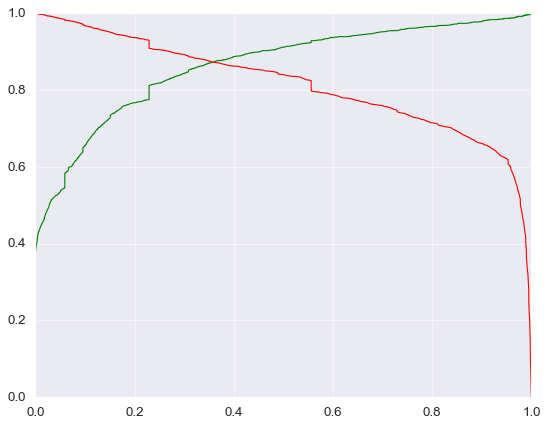

In [192]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  PREDICT TEST MODEL

In [193]:
#Fetching numerical variables from test data set
colnumerical=X_test.select_dtypes(include=['float64','int64']).columns

# Scaling the numerical variables of test dataset
X_test[colnumerical]=scale.fit_transform(X_test[colnumerical])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_Google,...,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_page visited on website,Last_Notable_Activity_resubscribed to emails,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed,Last_Notable_Activity_view in browser link clicked
4269,-0.298654,1.738658,0.933036,2.074447,-0.67689,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,-0.298654,-1.155538,-0.900812,-1.269139,-0.67689,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,-0.298654,0.653334,-0.793792,1.517182,-0.67689,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9199,-0.298654,-1.155538,-0.900812,-1.269139,-0.67689,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-0.298654,-1.155538,-0.900812,-1.269139,-0.67689,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
X_test = X_test[varsel]
X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Lead_Activity_email bounced,Lead_Activity_email opened,Lead_Activity_sms sent,Occupation_working professional,Tags_already a student,Tags_closed by horizzon,Tags_interested in other courses,Tags_ringing,Tags_will revert after reading the email,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation
4269,0.933036,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2376,-0.900812,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7766,-0.793792,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9199,-0.900812,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4359,-0.900812,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [195]:
# Adding StatsModel constant upon X_test dataset
X_test_stmod=sm.add_constant(X_test)

In [196]:
X_test_stmod.shape

(2772, 17)

In [197]:
#Making predictions on test dataset
y_test_predict= resultmod.predict(X_test_stmod)

In [198]:
y_test_predict[:10]

4269    0.709067
2376    0.994489
7766    0.894005
9199    0.001614
4359    0.977198
9186    0.986948
1631    0.975423
8963    0.900935
8007    0.031750
5324    0.968682
dtype: float64

In [199]:
y_predict=pd.DataFrame(y_test_predict)
y_predict.head(10)

,0
4269,0.709067
2376,0.994489
7766,0.894005
9199,0.001614
4359,0.977198
9186,0.986948
1631,0.975423
8963,0.900935
8007,0.031750
5324,0.968682


In [200]:
# Converting y_test to dataframe
# Putting CustID to index
y_testdataframe=pd.DataFrame(y_test)
y_testdataframe['Prospect ID']= y_testdataframe.index

In [201]:
# Removing index for both dataframes to append them side by side 
y_predict.reset_index(drop=True, inplace=True)
y_testdataframe.reset_index(drop=True, inplace=True)

In [202]:
# Appending y_testdataframe and y_predict
y_predict_final = pd.concat([y_testdataframe, y_predict],axis=1)
y_predict_final.head(10)

,Converted,Prospect ID,0
0,1,4269,0.709067
1,1,2376,0.994489
2,1,7766,0.894005
3,0,9199,0.001614
4,1,4359,0.977198
5,1,9186,0.986948
6,1,1631,0.975423
7,1,8963,0.900935
8,0,8007,0.031750
9,1,5324,0.968682


In [203]:
# Renaming the column 
y_predict_final= y_predict_final.rename(columns={ 0 : 'Converted_prob'})
y_predict_final.head(10)

,Converted,Prospect ID,Converted_prob
0,1,4269,0.709067
1,1,2376,0.994489
2,1,7766,0.894005
3,0,9199,0.001614
4,1,4359,0.977198
5,1,9186,0.986948
6,1,1631,0.975423
7,1,8963,0.900935
8,0,8007,0.031750
9,1,5324,0.968682


In [204]:
y_predict_final['Final_Predicted'] = y_predict_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_predict_final.head()

,Converted,Prospect ID,Converted_prob,Final_Predicted
0,1,4269,0.709067,1
1,1,2376,0.994489,1
2,1,7766,0.894005,1
3,0,9199,0.001614,0
4,1,4359,0.977198,1


In [205]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_predict_final.Converted, y_pred= y_predict_final.Final_Predicted)

0.8961038961038961

#### Hence we can see that the final prediction of conversions have a target rate of 89% (same as predictions made on training data set)

In [206]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_predict_final.Converted, y_pred= y_predict_final.Final_Predicted)
confusion2

array([[1502,  175],
       [ 113,  982]], dtype=int64)

In [207]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [208]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8968036529680365

In [209]:
# Let us calculate specificity
TN / float(TN+FP)

0.8956469886702445

In [210]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10435301132975551


In [211]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8487467588591184


In [212]:
# Negative predictive value
print (TN / float(TN+ FN))

0.930030959752322


In [213]:
precision_score(y_predict_final.Converted , y_predict_final.Final_Predicted)

0.8487467588591184

In [214]:
recall_score(y_predict_final.Converted, y_predict_final.Final_Predicted)

0.8968036529680365

### INSIGHTS:

#### TRAIN DATA:

**Accuracy : 90.76%**

**Sensitivity :83.98%**

**Specificity : 94.95%**

**Precision: 84%**

**Recall: 89%**

#### TEST DATA:
**Accuracy : 89.61%**

**Sensitivity :89.68%**

**Specificity : 89.58%**

**Precision: 84%**

**Recall: 89%**

##  CONCLUSION

###  ASSIGNING LEAD SCORE TO DATA SET

In [215]:
leadscore = leadinal
leadscore.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,...,Last_Notable_Activity_form submitted on website,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_page visited on website,Last_Notable_Activity_resubscribed to emails,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed,Last_Notable_Activity_view in browser link clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [216]:
# Scaling the numerical variables
leadscore[colnumerical] = scale.transform(leadscore[colnumerical])

In [217]:
# Removing all the variables which were not in our final model
leadscore = leadscore[varsel]
leadscore = sm.add_constant(leadscore)
leadscore.head()

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Lead_Activity_email bounced,Lead_Activity_email opened,Lead_Activity_sms sent,Occupation_working professional,Tags_already a student,Tags_closed by horizzon,Tags_interested in other courses,Tags_ringing,Tags_will revert after reading the email,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation
0,1.0,-0.900812,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1.0,0.321754,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1.0,1.878076,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1.0,-0.347574,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.0,1.689431,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [218]:
# Making predictions
leadscore_predict = resultmod.predict(leadscore)
leadscore_predict.head()

0    0.010452
1    0.012580
2    0.991053
3    0.001300
4    0.950269
dtype: float64

In [219]:
leadscore['Lead Score'] = round(leadscore_predict*100)
leadscore.head()

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Lead_Activity_email bounced,Lead_Activity_email opened,Lead_Activity_sms sent,Occupation_working professional,Tags_already a student,Tags_closed by horizzon,Tags_interested in other courses,Tags_ringing,Tags_will revert after reading the email,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Lead Score
0,1.0,-0.900812,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1.0
1,1.0,0.321754,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0
2,1.0,1.878076,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,99.0
3,1.0,-0.347574,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0
4,1.0,1.689431,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,95.0


In [220]:
leadscore['Lead Number']=Lead_Number
leadscore.head()

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Lead_Activity_email bounced,Lead_Activity_email opened,Lead_Activity_sms sent,Occupation_working professional,Tags_already a student,Tags_closed by horizzon,Tags_interested in other courses,Tags_ringing,Tags_will revert after reading the email,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Lead Score,Lead Number
0,1.0,-0.900812,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1.0,660737
1,1.0,0.321754,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0,660728
2,1.0,1.878076,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,99.0,660727
3,1.0,-0.347574,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,660719
4,1.0,1.689431,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,95.0,660681


###  INFERENCES

In [221]:
parameters=resultmod.params.sort_values(ascending=False)
parameters.head(3)

Tags_closed by horizzon                     6.685087
Tags_will revert after reading the email    4.223903
Lead Source_welingak website                3.573060
dtype: float64

#### 1. Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
       a.Tags_closed by horizzon
       b.Tags_will revert after reading the email
       c.Lead Source_welingak website

#### 2. The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
      a. The model achieved a sensitivity of 89.21% in the train set and 89.68% in the test set, using a cut-off value of 0.345.
     
      b. The model also achieved an accuracy of 89.61%, which is in line with the study's objectives.The CEO of X Education had set a target sensitivity of around 80%.

In [222]:
#As CEO of the company wants to know how much leads have the chances for having more than 80%
Hotleads=leadscore[leadscore['Lead Score']>80]
Hotleads.shape

(2626, 19)

In [223]:
parameters

Tags_closed by horizzon                           6.685087
Tags_will revert after reading the email          4.223903
Lead Source_welingak website                      3.573060
Last_Notable_Activity_had a phone conversation    2.665803
Lead Origin_lead add form                         2.080225
Lead_Activity_sms sent                            1.956086
Lead Source_olark chat                            1.316219
Total Time Spent on Website                       1.090308
Occupation_working professional                   0.856425
Lead_Activity_email opened                        0.518418
Lead_Activity_email bounced                      -0.798591
Last_Notable_Activity_olark chat conversation    -0.913706
Last_Notable_Activity_modified                   -1.033250
Tags_interested in other courses                 -1.768735
const                                            -2.082527
Tags_ringing                                     -3.149726
Tags_already a student                           -3.6457